<font size="+3"><b> PCA & Clustering Classification Machine Learning Model
</b></font>

***
* **Name** = Tahmeed Mahmud
***

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [ ]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

--2024-04-09 16:08:07--  https://archive.ics.uci.edu/static/public/236/seeds.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seeds.zip’

seeds.zip               [ <=>                ]   9.21K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-04-09 16:08:07 (102 MB/s) - ‘seeds.zip’ saved [9432]

Archive:  seeds.zip
 extracting: seeds_dataset.txt       


In [ ]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

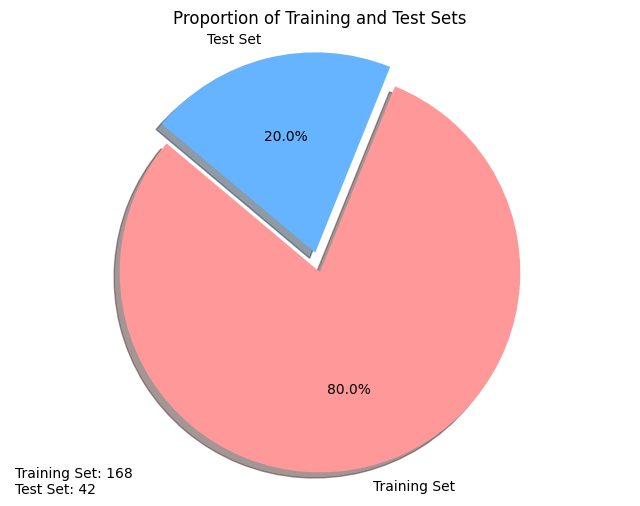

In [ ]:
# 1.1
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# features to X, target variable to y
X = data.drop('Type', axis=1)
y = data['Type']

# Stratified Split of X and y, train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


sizes = [len(y_train), len(y_test)]
labels = ['Training Set', 'Test Set']
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Proportion of Training and Test Sets')
plt.axis('equal')  # ensures that pie is drawn as a circle.

#  number of entries
train_test_counts = f"Training Set: {len(y_train)}\nTest Set: {len(y_test)}"
plt.annotate(train_test_counts, xy=(-1, -1), xytext=(-1.5, -1.2))

plt.show()


<font color='Green'><b>Answer:</b></font>

- **1.1** .....................

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


<font color='Green'><b>Answer:</b></font>

- **1.2**: The choice of scaler for this dataset is StandardScaler as it is suitable for optimization algorithms like Support Vector Machines or K-Nearest-Neighbors. The geometric parameters like area perimeter, width work well with this as StandardScaler ensures the features contribute equally. In distance calculations like SVM or K-NN, this scaler helps in minimizing bias.

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

<font color='Green'><b>Answer:</b></font>

- **1.3**: The model chosen for this datset is Support Vector Machines(SVM). This dataset has a lot of features and the SVM is robust to overfitting with high-dimensional data. The ability to generalize while avoiding overfitting is beneficial in this dataset. In addition, it can handle linear and non-linear data, given that this dataset has alot of geometric features, the relationship between features & classes is not clear, SVM's have the ability to handle situations where the relationship of classes and features isnt clear.  

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [ ]:
# 1.4
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#  pipeline with StandardScaler and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  #regularization parmeter
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],  #Kernel coefficient
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # specifies kernel type
    'svm__degree': [2, 3, 4]  # Degree of the polynomial kernel.
}

#grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)
optimized_model = grid_search.best_estimator_


Best Hyperparameters: {'svm__C': 100, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best Cross-validation Accuracy: 0.9639928698752229


<font color='Green'><b>Answer:</b></font>

- **1.4**: After creating the pipeline and executing the grid search, the best hyperparaamters for the SVM model is:
- C, regularization parameter: 100
- degree: 2
- kernel coefficient, gamma: scale
- kernel type: linear

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [ ]:
# 1.5
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Dimensionality Reduction with PCA & 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# Updated grid search using the 2 dimensional data
param_grid_pca = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__degree': [2, 3, 4]
}

# grid search on the PCA-reduced data
grid_search_pca = GridSearchCV(pipeline, param_grid_pca, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_pca.fit(X_train_pca, y_train)

#output best hyperparameter settings and accuracy
print("Best Hyperparameters with PCA:", grid_search_pca.best_params_)
print("Best Cross-validation Accuracy with PCA:", grid_search_pca.best_score_)
print("Best Cross-validation Accuracy without PCA:", grid_search.best_score_) # Comparing performance with the original data


Best Hyperparameters with PCA: {'svm__C': 100, 'svm__degree': 2, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best Cross-validation Accuracy with PCA: 0.9165775401069519
Best Cross-validation Accuracy without PCA: 0.9639928698752229


<font color='Green'><b>Answer:</b></font>

- **1.5**: The PCA is chosen as its efficient on datasets with linear relationships among features which is the case in the present seed dataset. It is well-suited for high-dimensional data and noise reduction which could lead to faster computation.

### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

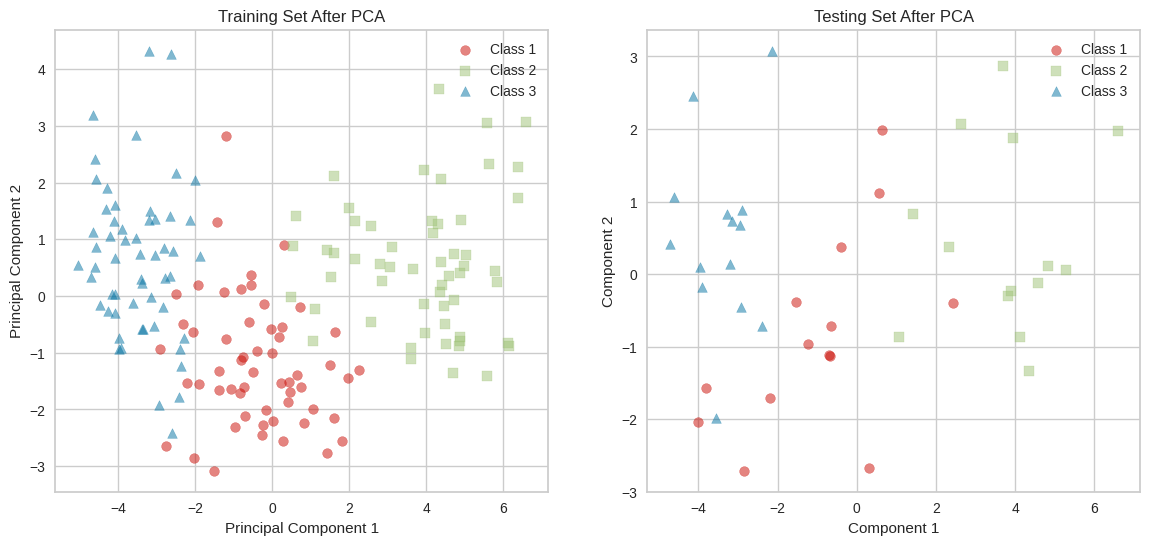

In [ ]:
# 1.6
import matplotlib.pyplot as plt
import numpy as np
# Prepare class labels and markers
classes = np.unique(y_train)
markers = ['o', 's', '^']  #  Circle, Square, Triangle
colors = ['r', 'g', 'b']  #  Red, Green, Blue

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting training set
for class_label, marker, color in zip(classes, markers, colors):
    ax[0].scatter(X_train_pca[y_train == class_label, 0], X_train_pca[y_train == class_label, 1],
                  marker=marker, color=color, label=f'Class {class_label}', alpha=0.5)

ax[0].set_title('Training Set After PCA')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[0].legend()

# Plotting testing set
for class_label, marker, color in zip(classes, markers, colors):
    ax[1].scatter(X_test_pca[y_test == class_label, 0], X_test_pca[y_test == class_label, 1],
                  marker=marker, color=color, label=f'Class {class_label}', alpha=0.5)

ax[1].set_title('Testing Set After PCA')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')
ax[1].legend()

plt.show()


## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

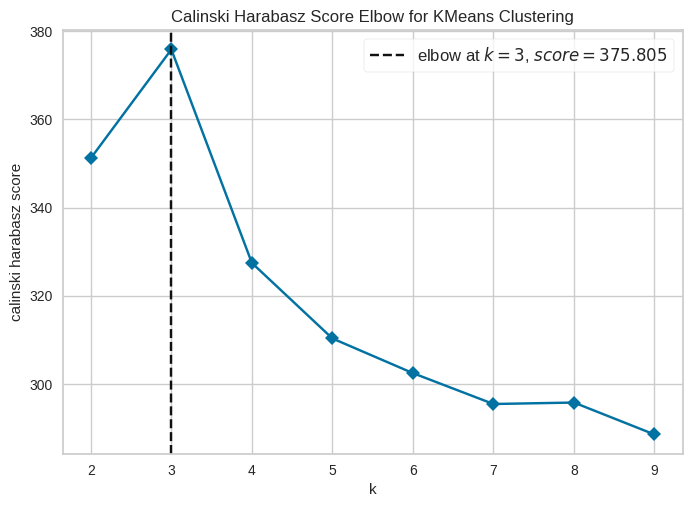

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
# 2.1
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#pipeline with sclaer and kmeans
clustering_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

#KElbowVisualizer with KMeans model and Calinski-Harabasz metric
visualizer = KElbowVisualizer(clustering_pipeline.named_steps['kmeans'], k=(2,10), metric='calinski_harabasz', timings=False)

# Fit the data to the visualizer to find the optimal k
visualizer.fit(X)
visualizer.show()

<font color='Green'><b>Answer:</b></font>

- **2.1**: The elbow point is at k = 3 which represents the optimal number of clusters. Going past 3 clusters decreases the calinski harabasz score as seen in the graph. This score represents the measure of cluster validity based on how close related objects in the same cluster are and how well-seperated different clusters are. The higher the score, the more seperated and distinct.

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [ ]:
# 2.2
optimal_k = visualizer.elbow_value_  #the optimal k

# Update the KMeans model in the pipeline with the optimal # of clusters, fit it after
clustering_pipeline.set_params(kmeans=KMeans(n_clusters=optimal_k, random_state=42))
clustering_pipeline.fit(X)

#get the cluster labels and add to dataset
cluster_labels = clustering_pipeline.named_steps['kmeans'].labels_
data['Cluster'] = cluster_labels
print(data.head())


    Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry Coefficient  Length of Kernel Groove  Type  Cluster  
0                  2.221                    5.220     1        2  
1                  1.018                    4.956     1        2  
2                  2.699                    4.825     1        2  
3                  2.259                    4.805     1        2  
4                  1.355                    5.175     1        2  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [ ]:
# 2.3
from sklearn.decomposition import PCA

# Initialize PCA w/2 components
pca = PCA(n_components=2)

# Fit and transform the dataset with PCA
X_pca = pca.fit_transform(X)




#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

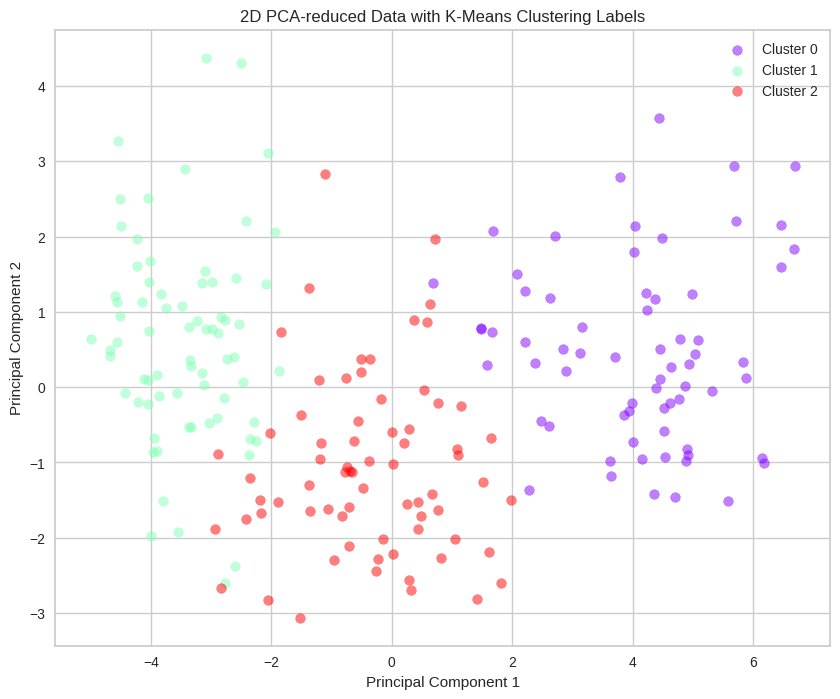

In [ ]:
# 2.4
# Unique cluster labels
unique_labels = np.unique(cluster_labels)
# Generate a color palette with the same number of colors as unique labels
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

#Create scatter plot
plt.figure(figsize=(10, 8))
for label, color in zip(unique_labels, colors):
    plt.scatter(X_pca[cluster_labels == label, 0], X_pca[cluster_labels == label, 1],
                label=f'Cluster {label}', color=color, alpha=0.5)

plt.title('2D PCA-reduced Data with K-Means Clustering Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

  <font color='Green'><b>Answer:</b></font>

- **Bonus Question**: Looking at the graph, the data is clearly organized into three different clusters. Cluster 1(left) resides in -2 or below PC1, cluster 2(middle) resides around -2 to +2 PC1, and cluster 0(right) remains mostly past the +2 PC1. Soem overlap between clusters 1 and 2 occur at -2 PC1 and more overlap occurs at +2 PC1 between clusters 2 and 0. These clear seperations between clusters represent patterns in the data that show distinct data points. The overlap between clusters represent nuances in the data and are transitional areas.